In [1]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
def smoothsegment(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])


def plot_dendrogram(icoord,dcoord,figsize, polar=False, log=True):
    if polar:
        if log:
            dcoord = -np.log(dcoord+1)
        else:
            dcoord = -(dcoord+1)
        # avoid a wedge over the radial labels
        gap = 0.1
        imax = icoord.max()
        imin = icoord.min()
        icoord = ((icoord - imin)/(imax - imin)*(1-gap) + gap/2)*2*np.pi
    with plt.style.context("seaborn-white"):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, polar=polar)
        for xs, ys in zip(icoord, dcoord):
            if polar:
                xs = smoothsegment(xs)
                ys = smoothsegment(ys)
            ax.plot(xs,ys, color="black")
        ax.set_title(f"Polar= {polar}", fontsize=15)
        if polar:
            ax.spines['polar'].set_visible(False)
            ax.set_rlabel_position(0)
            Nxticks = 10
            xticks = np.linspace(gap/2, 1-gap/2, Nxticks)
            ax.set_xticks(xticks*np.pi*2)
            ax.set_xticklabels(np.round(np.linspace(imin, imax, Nxticks)).astype(int))  


In [ ]:
dg = hierarchy.dendrogram(Z)

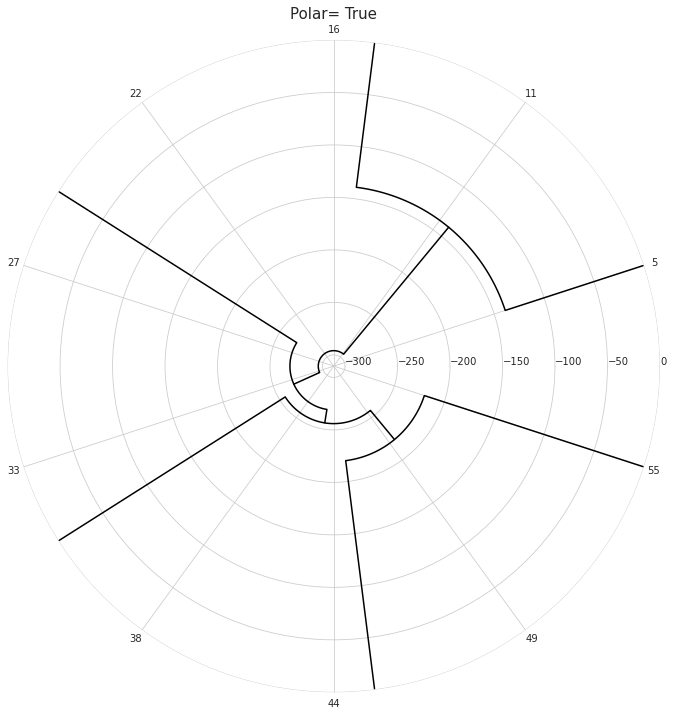

In [23]:
plot_dendrogram(np.array(dg['icoord']), np.array(dg['dcoord']), (12, 12), True, False)

In [2]:
data = pd.read_parquet('/Users/martin/Dropbox/Academia/Data/Geo/Prague/UAP/contextual_norm.parquet')

In [51]:
data

,stcOri_meanIQ3,stcOri_rangeIQ3,stcOri_theilID3,sdcLAL_meanIQ3,sdcLAL_rangeIQ3,sdcLAL_theilID3,sdcAre_meanIQ3,sdcAre_rangeIQ3,sdcAre_theilID3,sscCCo_meanIQ3,...,ldsCDL_simpson,xcnSCl_simpson,mtdMDi_simpson,lddNDe_simpson,linWID_simpson,lddRea_simpson,lddARe_simpson,sddAre_simpson,midRea_simpson,midAre_simpson
uID,,,,,,,,,,,,,,,,,,,,,
0,-0.730601,-1.626832,-0.940207,0.771474,0.374393,-0.326396,0.573462,0.873233,0.048432,0.277732,...,-0.856182,-1.305426,-1.005496,0.030987,0.030987,0.081495,-0.374363,-0.341436,1.739773,-0.272407
1,-1.267597,0.105433,2.087503,-0.762487,-0.294023,-0.016537,-0.470946,-0.547477,-0.701014,0.149702,...,1.628671,-0.868761,0.106589,0.030987,0.030987,-0.008678,-0.368561,0.746982,-0.520122,0.241211
2,1.260304,1.888434,0.007116,1.073765,1.368934,0.281028,0.643184,1.286359,0.089879,-0.242740,...,-1.395729,-0.008523,-1.148430,0.030987,0.030987,-1.017532,-1.471335,-1.328740,-0.812612,-0.903033
3,-1.031557,0.088286,1.611709,0.636875,0.115584,-0.354176,0.313387,0.365854,-0.117039,0.155425,...,-0.575675,1.219485,-1.023025,0.030987,0.030987,0.083694,-0.360476,0.163765,-0.707257,-0.802357
4,1.162756,1.754106,-0.116637,0.113982,0.895628,0.840675,-0.068614,0.498329,1.464851,-0.321720,...,-0.359394,1.118670,-0.192652,0.030987,0.030987,-0.964927,-0.980020,0.516311,-1.308218,-0.345277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137394,0.630049,1.035925,-0.312253,0.498685,1.407963,0.758824,-0.072877,-0.150717,0.669002,-0.540091,...,0.105654,-0.632577,0.205397,0.030987,0.030987,1.252217,-0.551426,-1.088735,0.311249,-1.170746
137395,0.367707,0.671833,-0.407575,0.044151,0.492615,0.760494,-0.168153,-0.244410,0.378121,-0.169320,...,-0.658854,-0.884775,0.810311,0.030987,0.030987,0.701244,-0.603041,-1.024345,-0.395621,-1.003181
137396,0.739007,-0.127258,-0.778357,-0.762092,-0.983436,-0.936706,-0.355174,-0.651555,-0.933402,1.953408,...,-0.191505,-0.548600,0.363624,0.030987,0.030987,-0.670115,-0.762714,-0.926584,-0.645105,-0.811409


In [3]:
cluster = pd.read_csv("/Users/martin/Dropbox/Academia/Contracts/UAP Prague/2020.01_Zakázka MF/01_data/02_finální data/data/prediction_19.csv")

In [4]:
group = data.groupby(cluster.cluster.values).mean()
Z = hierarchy.linkage(group, 'ward')

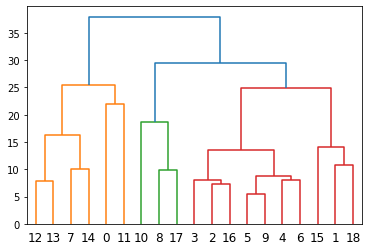

In [53]:
dg = hierarchy.dendrogram(Z)

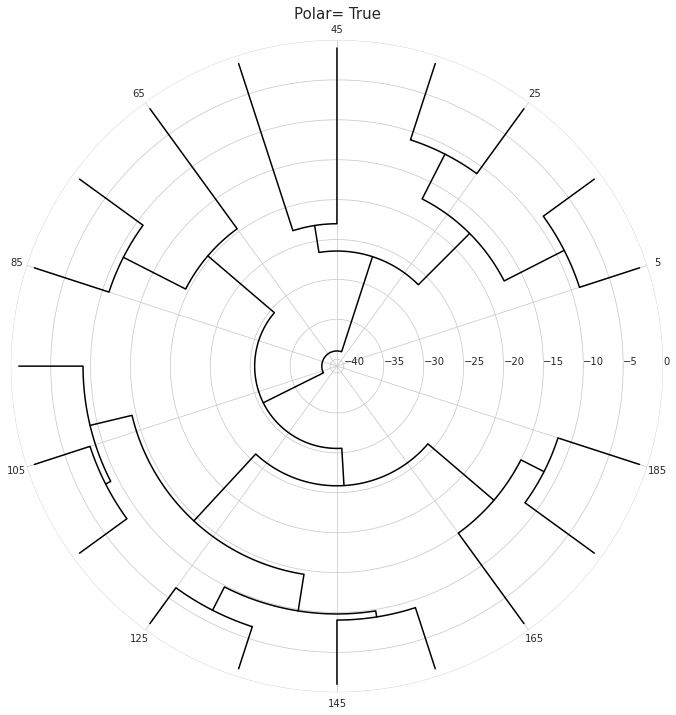

In [57]:
plot_dendrogram(np.array(dg['icoord']), np.array(dg['dcoord']), (12, 12), True, False)
plt.savefig("/Users/martin/Dropbox/Academia/Contracts/StoryMap Prague/polar_dendrogram.svg")

<AxesSubplot:xlabel='cluster'>

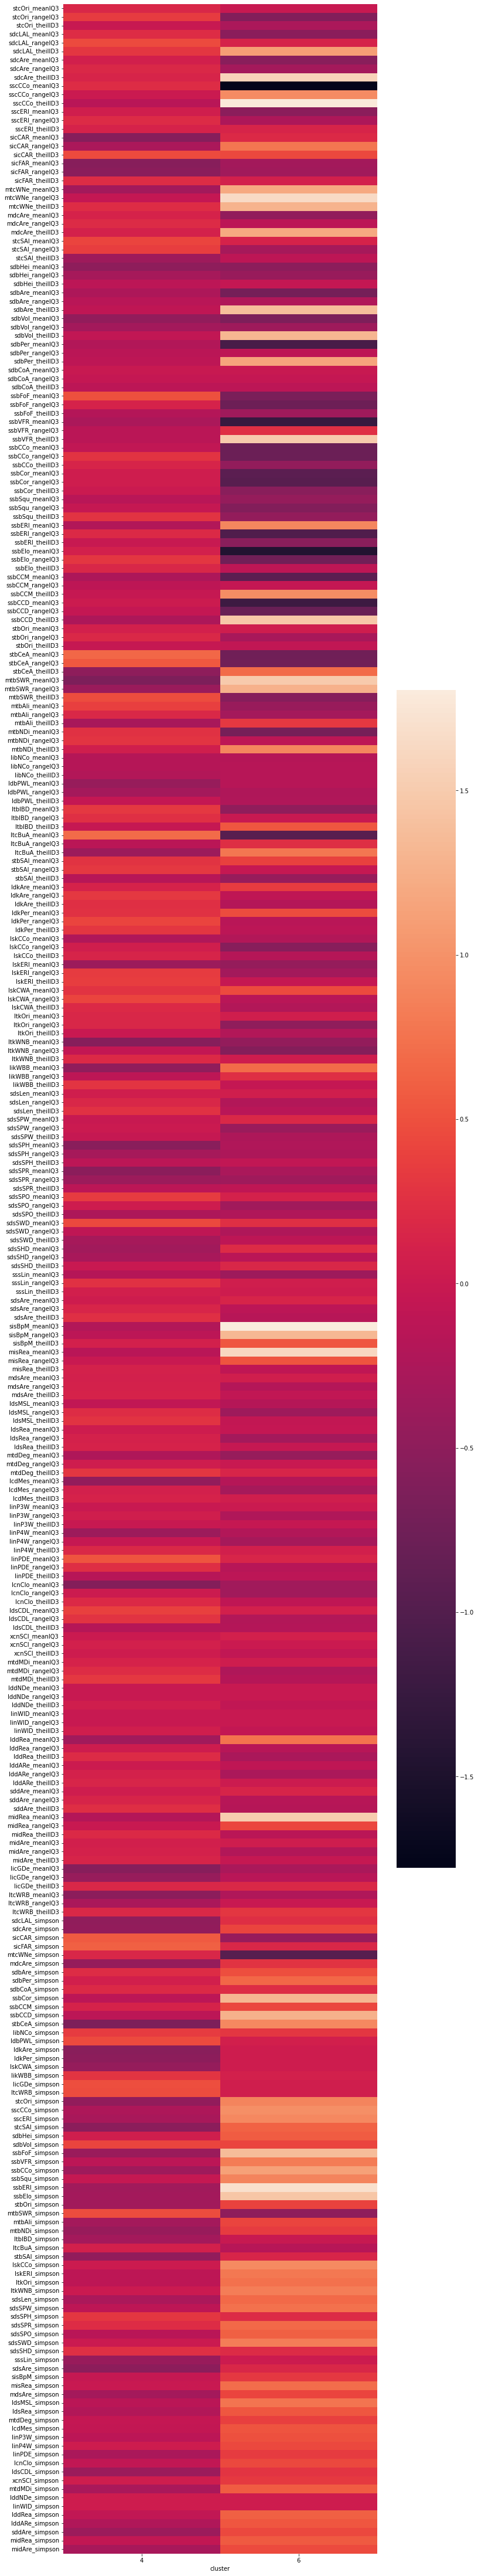

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

mapping = {
    12: 0,
    13: 0,
    7: 1,
    14: 1,
    0: 2, 11:2, 10:3, 8:3, 17:3, 3:4, 2:4, 16:4, 4:5, 5:5, 6:5, 9:5, 15:6, 1:6, 18:6

}

plt.subplots(figsize=(12, 80))
sns.heatmap(data.groupby(cluster.cluster.map(mapping)).mean().T[[4, 6]])

In [17]:
cluster.cluster.map(mapping).value_counts() / cluster.shape[0]

5    0.362528
4    0.244005
3    0.130394
6    0.098654
0    0.082075
1    0.057060
2    0.025284
Name: cluster, dtype: float64